# Deskripsi Project :

Pada Project ini kita akan mempersiapkan prototipe Machine Learning untuk Perusahaan Penambangan Emas Zyfra. Perusahaan ini mengenembangkan solulusi untuk efesiensi untuk industri berat. Model dari Machine Learning yang kita persiapkan dapat memprediksi jumlah emas yang diperoleh dari bijih emas. kita diberi akses dara mengenai ekstraksi bahan mentah emas dan pemurnian emas. Tugas yang diberikan adalah Membuat Model Machine Learning yang dapat mengoptimalkan Produksi dan menghilangkan paramater yang tidak menguntungkan. 

---

Technological Process: 

Bagaimana emas diekstraksi dari bijih? Mari kita lihat tahapan prosesnya. 
Bijih yang ditambang mengalami pemrosesan primer untuk mendapatkan campuran bijih atau bahan kasar, yang merupakan bahan baku untuk Flotation (juga dikenal sebagai proses bahan kasar). Setelah flotasi, material dikirim ke pemurnian dua tahap.

1. Flotation Process : 
Campuran bijih emas dimasukkan ke dalam float bank untuk mendapatkan konsentrat Au yang lebih kasar dan ekor yang lebih kasar (residu produk dengan konsentrasi logam mulia yang rendah).
Stabilitas proses ini dipengaruhi oleh keadaan fisikokimia pulp flotasi yang mudah menguap dan tidak optimal (campuran partikel padat dan cair).

2. Purification Process :
Konsentrat yang lebih kasar mengalami dua tahap pemurnian. Setelah pemurnian, kami memiliki konsentrat terakhir dan ekor baru.

---

Deskripsi Data :
1. Technological process :

* Rougher feed — raw material
* Rougher additions (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant
* Xanthate — promoter or flotation activator;
* Sulphate — sodium sulphide for this particular process;
* Depressant — sodium silicate.
* Rougher process — flotation
* Rougher tails — product residues
* Float banks — flotation unit
* Cleaner process — purification
* Rougher Au — rougher gold concentrate
* Final Au — final gold concentrate

2. Parameters of stages: 
* air amount — volume of air
* fluid levels
* feed size — feed particle size
* feed rate

---

Tahapan proses teknologi untuk ekstraksi emas dari bijih ditampilkan : 


In [1]:
from IPython.display import Image
Image(url= 'https://pictures.s3.yandex.net/resources/ore_1591699963.jpg',width = 500, height = 200 )

Objektif Project : 

1. Simulasikan proses pemulihan emas dari bijih emas

2. Mengembangkan model untuk memprediksi jumlah emas yang diperoleh dan mengoptimalkan produksi emas

3. Menghitung metrik sMAPE value. 



## Prepare the data

# Memuat Libary yang dibutuhkan untuk pemrosesan data

In [2]:
# import pandas and numpy untuk proses dan manipulasi data
import pandas as pd
import numpy as np 

# import timeit untuk perhitungan waktu 
import timeit

# Import seaborn untuk statistika data visualisasi
import seaborn as sns

# import matplotlib untuk data visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

# import train_test_split untuk membagi data
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler 
pd.options.mode.chained_assignment = None #menghilangkan notif CopyWarning

# import modul machine learning regressi dari library sklearn
from sklearn.dummy import DummyRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 

# import sanity check untuk memeriksa fungsi terhadap model
from sklearn.metrics import *

# import warnings untuk menghapus peringatan saat dataset di manipulasi
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# Memuat Data dari csv agar dapat dijalankan dengan pandas untuk menjadi DataFrame

In [3]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test  = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_recovery_full   = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
# Membuat Fungsi untuk menentukan jika ada columns yang memiliki nilai yang hilang
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} dengan {:.{}%} persentasi nilai yang hilang , dan {} nilai yang hilang'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'Terdapat {} columns dengan nilai NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'Tidak Terdapat columns dengan nilai NA.' + "\033[0m")
        
# Fungsi untuk melihat informasi keseluruhan pada dataset 
def get_info(df):
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns dengan nilai yang hilang:')
    display(get_percent_of_na(df, 4))  
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'Kita mempunyai {} baris yang terduplikasi.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

### Mempelajari informasi umum pada keseluruhan dataset  


In [5]:
print('Informasi Umum pada Dataset gold_recovery_train')
get_info(gold_recovery_train)

Informasi Umum pada Dataset gold_recovery_train
----------------------------------------------------------------------------------------------------
Head:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                             

None

----------------------------------------------------------------------------------------------------
Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


----------------------------------------------------------------------------------------------------


,date
count,16860
unique,16860
top,2018-05-19 07:59:59
freq,1



Columns dengan nilai yang hilang:
Column final.output.concentrate_ag dengan 0.4270% persentasi nilai yang hilang , dan 72 nilai yang hilang
Column final.output.concentrate_pb dengan 0.4270% persentasi nilai yang hilang , dan 72 nilai yang hilang
Column final.output.concentrate_sol dengan 2.1945% persentasi nilai yang hilang , dan 370 nilai yang hilang
Column final.output.concentrate_au dengan 0.4211% persentasi nilai yang hilang , dan 71 nilai yang hilang
Column final.output.recovery dengan 9.0214% persentasi nilai yang hilang , dan 1521 nilai yang hilang
Column final.output.tail_ag dengan 0.3915% persentasi nilai yang hilang , dan 66 nilai yang hilang
Column final.output.tail_pb dengan 1.0854% persentasi nilai yang hilang , dan 183 nilai yang hilang
Column final.output.tail_sol dengan 0.8600% persentasi nilai yang hilang , dan 145 nilai yang hilang
Column final.output.tail_au dengan 0.3915% persentasi nilai yang hilang , dan 66 nilai yang hilang
Column primary_cleaner.input.sulfate d

None

----------------------------------------------------------------------------------------------------
Shape:
(16860, 87)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita mempunyai 0 baris yang terduplikasi.




In [6]:
print('Informasi Umum pada Dataset gold_recovery_test')
get_info(gold_recovery_test)

Informasi Umum pada Dataset gold_recovery_test
----------------------------------------------------------------------------------------------------
Head:



,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 n

None

----------------------------------------------------------------------------------------------------
Describe:



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


----------------------------------------------------------------------------------------------------


,date
count,5856
unique,5856
top,2016-11-19 01:59:59
freq,1



Columns dengan nilai yang hilang:
Column primary_cleaner.input.sulfate dengan 5.1571% persentasi nilai yang hilang , dan 302 nilai yang hilang
Column primary_cleaner.input.depressant dengan 4.8497% persentasi nilai yang hilang , dan 284 nilai yang hilang
Column primary_cleaner.input.xanthate dengan 2.8347% persentasi nilai yang hilang , dan 166 nilai yang hilang
Column primary_cleaner.state.floatbank8_a_air dengan 0.2732% persentasi nilai yang hilang , dan 16 nilai yang hilang
Column primary_cleaner.state.floatbank8_a_level dengan 0.2732% persentasi nilai yang hilang , dan 16 nilai yang hilang
Column primary_cleaner.state.floatbank8_b_air dengan 0.2732% persentasi nilai yang hilang , dan 16 nilai yang hilang
Column primary_cleaner.state.floatbank8_b_level dengan 0.2732% persentasi nilai yang hilang , dan 16 nilai yang hilang
Column primary_cleaner.state.floatbank8_c_air dengan 0.2732% persentasi nilai yang hilang , dan 16 nilai yang hilang
Column primary_cleaner.state.floatbank8_c_lev

None

----------------------------------------------------------------------------------------------------
Shape:
(5856, 53)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita mempunyai 0 baris yang terduplikasi.




In [7]:
print('Informasi Umum pada Dataset gold_recovery_full')
get_info(gold_recovery_full)

Informasi Umum pada Dataset gold_recovery_full
----------------------------------------------------------------------------------------------------
Head:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                             

None

----------------------------------------------------------------------------------------------------
Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


----------------------------------------------------------------------------------------------------


,date
count,22716
unique,22716
top,2018-05-19 07:59:59
freq,1



Columns dengan nilai yang hilang:
Column final.output.concentrate_ag dengan 0.3918% persentasi nilai yang hilang , dan 89 nilai yang hilang
Column final.output.concentrate_pb dengan 0.3830% persentasi nilai yang hilang , dan 87 nilai yang hilang
Column final.output.concentrate_sol dengan 1.6948% persentasi nilai yang hilang , dan 385 nilai yang hilang
Column final.output.concentrate_au dengan 0.3786% persentasi nilai yang hilang , dan 86 nilai yang hilang
Column final.output.recovery dengan 8.6415% persentasi nilai yang hilang , dan 1963 nilai yang hilang
Column final.output.tail_ag dengan 0.3654% persentasi nilai yang hilang , dan 83 nilai yang hilang
Column final.output.tail_pb dengan 0.8804% persentasi nilai yang hilang , dan 200 nilai yang hilang
Column final.output.tail_sol dengan 1.1930% persentasi nilai yang hilang , dan 271 nilai yang hilang
Column final.output.tail_au dengan 0.3566% persentasi nilai yang hilang , dan 81 nilai yang hilang
Column primary_cleaner.input.sulfate d

None

----------------------------------------------------------------------------------------------------
Shape:
(22716, 87)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita mempunyai 0 baris yang terduplikasi.




Kesimpulan : 

Setelah Mempelajari Informasi Umum pada kesuluruhan data set, dapat disimpulkan :

1. pada dataset gold_recovery_train terdapat 16.860 rows, 86 columns dan 85 column dengan nilai yang hilan NA.
2. pada dataset gold_recovery_test terdapat 5.858 rows, 52 columns dan 51 column dengan nilai yang hilan NA.
3. pada dataset gold_recovery_full terdapat 22.716 rows, 86 columns dan 85 column dengan nilai yang hilan NA.

### Memriksa apakah pemulihan dihitung dengan benar. Dengan menggunakan dataset training, hitung pemulihan untuk fitur [rougher.output.recovery.] dan menemukan MAE (Mean Absolute Error) antara perhitungan dan nilai fitur.


In [8]:
from IPython.display import Image
Image(url= 'https://pictures.s3.yandex.net/resources/Recovery_1576238822_1589899219.jpg',width = 500, height = 200 )

In [9]:
# Data Ekstrasi Emas
C = gold_recovery_train['rougher.output.concentrate_au']
F = gold_recovery_train['rougher.input.feed_au']
T = gold_recovery_train['rougher.output.tail_au']

# Perhitungan Recovery
calculated_recovery = (C * (F - T)) / (F * (C - T)) * 100
print(calculated_recovery.sample(10))

4855     60.396106
8797           NaN
4499     88.462037
9931     76.655054
7378     83.538549
1763     77.391452
12827    89.899717
8332     80.156727
16829    88.153491
12751    93.072489
dtype: float64


In [10]:
# Perhitungn Mean Absolute Error 
mae_calc = pd.DataFrame({'calculated_recovery' : calculated_recovery, 
                         'output_recovery' : gold_recovery_train['rougher.output.recovery']}).dropna()

# Menampilkan perhitunga MAE
mae = mean_absolute_error(mae_calc.calculated_recovery, mae_calc.output_recovery)
print('Score Mean Absolute Error dari rougher.output.recovery : {:.2f}'.format(mae))

Score Mean Absolute Error dari rougher.output.recovery : 0.00


In [11]:
# Memeriksa sample dari perhitungan recovery dan output recovery 
mae_calc.sample(10)

,calculated_recovery,output_recovery
14867,88.478982,88.478982
290,78.741704,78.741704
9249,-0.000000,0.000000
407,82.024248,82.024248
11053,91.366706,91.366706
1170,42.413734,42.413734
6523,99.254694,99.254694
15745,95.639581,95.639581
7140,81.572936,81.572936
4478,90.167393,90.167393


Kesimpulan :

Dari perhitungan yang dilakukan, kita dapat melihat bahwa  calculated_recovery dan rougher.output.recovery memiliki nilai yang sama. dan score Mean Absolute Erronya adalah 0,0. Ini menunjukkan bahwa nilai yang dihitung dari proses pemulihan yang disimulasikan mirip dengan rougher.output.recovery.


### Memeriksa fitur yang tidak tersedia serta parameter dan tipe logam nya di set pengujian

In [12]:
# Fitur yang tidak tersedia di dataset test 
features_diff = list(set(gold_recovery_train.columns).difference(gold_recovery_test.columns))
features_diff = pd.DataFrame(features_diff, columns= ['feature_diff_test'])
features_diff

,feature_diff_test
0,rougher.output.concentrate_sol
1,final.output.concentrate_pb
2,final.output.tail_ag
3,primary_cleaner.output.tail_ag
4,final.output.concentrate_sol
5,rougher.calculation.floatbank10_sulfate_to_au_...
6,rougher.output.tail_au
7,rougher.output.concentrate_ag
8,rougher.output.tail_pb
9,secondary_cleaner.output.tail_sol


In [13]:
from IPython.display import Image
Image(url= 'https://3.bp.blogspot.com/-WRvhf9RqPeY/W-esQxepAyI/AAAAAAAAJT0/rcr7BmoeJvUCdKdXwVFAgY6swwWFWA2wACLcBGAs/s1600/Unsur%2BPseudo%2Bgas%2BMulia.jpg',width = 500, height = 200 )

Kesimpulan :

Setelah memeriksa fitur yang tidak tersedia di dataset test, dapat dilihat dataset train memiliki 34 fitur  yang tidak tersedia di dataset test. Fitur yang tidak terdapat pada dataset test antara lain fitur yang mengandung konsentrasi logam Au = emas, Ag = perak , Pb = timbal. dan jenis parameternya adalah output — product parameters, calculation — calculation characteristics


### Data Preprocessing.

In [14]:
# Fungsi untuk menghitung persentase nilai yang hilang
def missing_values_table(df):

    # Total nilai yang hilang
    mis_val = df.isnull().sum()

    # Persentase Nilai yang hilang
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Membuat tabel dengan hasil
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Merubah nama colum
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'jumlah nilai yang hilang', 1 : 'persentase nilai yang hilang'})

    # Sort tabel berdasarkan persentase nilai yang hilang 
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'persentase nilai yang hilang', ascending=False).round(1)

    # Menampilkan Informasi 
    print ("Dataset ini Memiliki " + str(df.shape[1]) + " columns.\n"      
        "Terdapat " + str(mis_val_table_ren_columns.shape[0]) +
            " columns yang memiliki nilai yang hilang." )
    print('-'*50)
    print(df.info())

    return mis_val_table_ren_columns

In [15]:
missing_values_table(gold_recovery_train)

Dataset ini Memiliki 87 columns.
Terdapat 85 columns yang memiliki nilai yang hilang.
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb

,jumlah nilai yang hilang,persentase nilai yang hilang
rougher.output.recovery,2573,15.3
rougher.output.tail_ag,2250,13.3
rougher.output.tail_au,2249,13.3
rougher.output.tail_sol,2249,13.3
secondary_cleaner.output.tail_sol,1986,11.8
...,...,...
primary_cleaner.state.floatbank8_b_level,27,0.2
primary_cleaner.state.floatbank8_c_level,27,0.2
primary_cleaner.state.floatbank8_d_level,27,0.2
rougher.calculation.sulfate_to_au_concentrate,27,0.2


In [16]:
missing_values_table(gold_recovery_test)

Dataset ini Memiliki 53 columns.
Terdapat 51 columns yang memiliki nilai yang hilang.
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state

,jumlah nilai yang hilang,persentase nilai yang hilang
rougher.input.floatbank11_xanthate,353,6.0
primary_cleaner.input.sulfate,302,5.2
primary_cleaner.input.depressant,284,4.8
rougher.input.floatbank10_sulfate,257,4.4
primary_cleaner.input.xanthate,166,2.8
rougher.input.floatbank10_xanthate,123,2.1
rougher.input.feed_sol,67,1.1
rougher.input.floatbank11_sulfate,55,0.9
rougher.input.feed_rate,40,0.7
secondary_cleaner.state.floatbank3_a_air,34,0.6


In [17]:
missing_values_table(gold_recovery_full)

Dataset ini Memiliki 87 columns.
Terdapat 85 columns yang memiliki nilai yang hilang.
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb

,jumlah nilai yang hilang,persentase nilai yang hilang
rougher.output.recovery,3119,13.7
rougher.output.tail_ag,2737,12.0
rougher.output.tail_au,2736,12.0
rougher.output.tail_sol,2736,12.0
rougher.input.floatbank11_xanthate,2257,9.9
...,...,...
rougher.calculation.floatbank10_sulfate_to_au_feed,44,0.2
rougher.calculation.floatbank11_sulfate_to_au_feed,44,0.2
primary_cleaner.state.floatbank8_d_level,43,0.2
primary_cleaner.state.floatbank8_c_level,43,0.2


In [18]:
# fungsi untuk mengubah column date menjadi tipe data datetime 
def convert_date_time(df, col):
    df[col] = pd.to_datetime(df[col])
    df.sort_values(col, inplace=True)
    
# fungsi untuk mengisi nilai yang hilang dengan metode 'ffill' 
def fill_missing_values(df):
    df = df.fillna(method='ffill', axis=0, inplace=True)

In [19]:
# mengisi nilai yang hilang dengan metode 'ffill' 
fill_missing_values(gold_recovery_train)
fill_missing_values(gold_recovery_test)
fill_missing_values(gold_recovery_full)

# mengubah column date menjadi tipe data datetim
convert_date_time(gold_recovery_train, 'date')
convert_date_time(gold_recovery_test, 'date')
convert_date_time(gold_recovery_full, 'date')

In [20]:
missing_values_table(gold_recovery_train)

Dataset ini Memiliki 87 columns.
Terdapat 0 columns yang memiliki nilai yang hilang.
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                          

,jumlah nilai yang hilang,persentase nilai yang hilang


In [21]:
missing_values_table(gold_recovery_test)

Dataset ini Memiliki 53 columns.
Terdapat 0 columns yang memiliki nilai yang hilang.
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8

,jumlah nilai yang hilang,persentase nilai yang hilang


In [22]:
missing_values_table(gold_recovery_full)

Dataset ini Memiliki 87 columns.
Terdapat 0 columns yang memiliki nilai yang hilang.
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22716 non-null  float64       
 2   final.output.concentrate_pb                         22716 non-null  float64       
 3   final.output.concentrate_sol                        22716 non-null  float64       
 4   final.output.concentrate_au                         22716 non-null  float64       
 5   final.output.recovery                               22716 non-null  float64       
 6   final.output.tail_ag                          

,jumlah nilai yang hilang,persentase nilai yang hilang


Kesimpulan : 

Pada tahap ini, kita memeriksa data dan mengamati bahwa : 
1. data gold_recovery_train, memiliki 16.860 rows, 86 features, dan 85 columns ngan NA. 
2. data gold_recovery_test , memiliki 5.856 rows, 52 features, dan 51 columns dengan NA. 
3. data gold_recovery_full , memiliki 22.716 baris, 86 features, dan 85 columns dengan NA. 

lalu setelah memeriksa dataset kita mendapati bahwa features 'date' memiliki tipe data yang tidak tepat. setelah merubah tipe data ke tipe data datetime kita mengisi nilai yang hilang dengan metode ffill metode ini mengganti nilai yang hilang dengan nilai dari baris sebelumnya (atau kolom sebelumnya, jika parameter sumbu diatur ke 'kolom').

## Menganalisa Data

### Analisis bagaimana konsentrasi logam (Au, Ag, Pb) berubah tergantung pada tahap pemurnian 

Untuk mengetahui bagaimana konsentrasi logam (Au, Ag, Pb) berubah tergantung pada tahap purification, kita memplot distribusi konsentrasi di setiap tahap.

In [23]:
# Membuat variabel untuk perhitungan konsentrasi logam distribusi
metals = ['au', 'ag', 'pb']
stage_parameter = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
xcolors = ['green', 'orange', 'dodgerblue']

# Fungsi untuk membuat plot distribusi dari setiao konsentrasi logam
def plot_distribution(df):
    kwargs = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2})
    for element in metals:
        plt.figure(figsize=(10,6), dpi=80)
        for features, colour in zip(stage_parameter, xcolors):
            sns.distplot(df[features+'_'+element], color=colour, label=features+'_'+element, **kwargs)
            plt.axvline(0, c="r")
        plt.title('Distribusi dari ' +element+ ' Konsentrasi di seluruh tahap purification')
        plt.xlabel('Konsentrasi dari '+element)
        plt.legend();

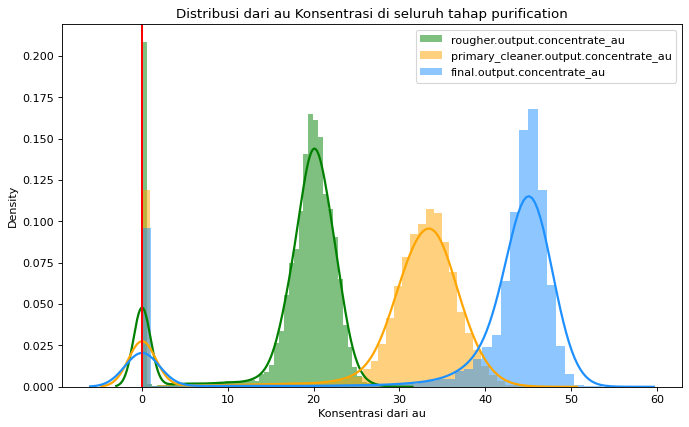

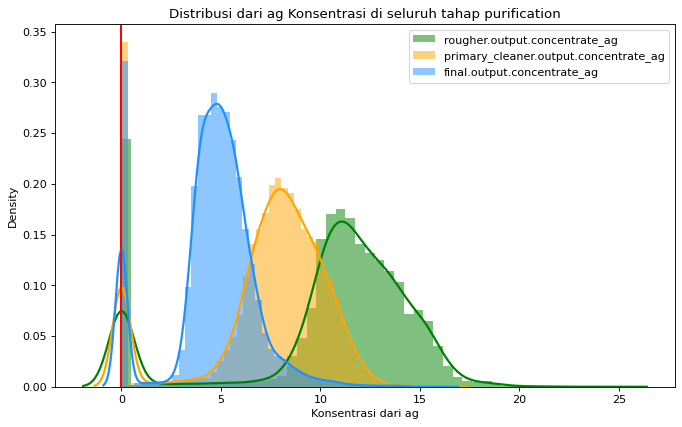

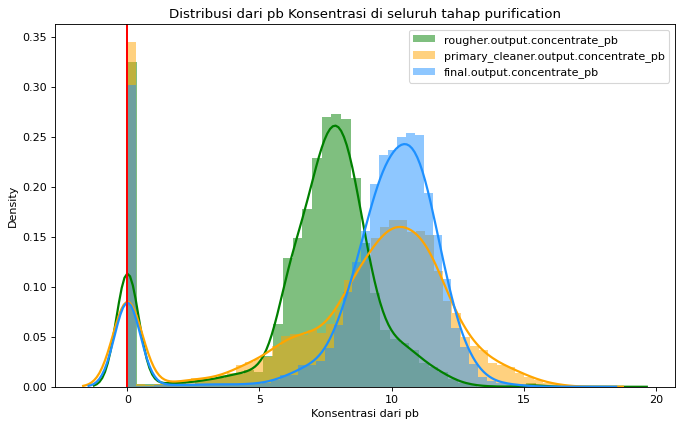

In [24]:
# Menjalankan fungsi plot distribusi
plot_distribution(gold_recovery_train)

Kesimpulan

Plot di atas menunjukkan distribusi konsentrasi logam di seluruh tahap pemurnian. Melihat plot, kita mengamati bahwa konsentrasi emas (au) meningkat dari proses the rougher.output ke final.output. Hal ini menunjukkan bahwa proses berjalan sebagaimana mestinya. Konsentrasi logam lain menurun dalam kasus perak (ag) atau tetap hampir sama seperti timbal (pb).

### Membandingkan distribusi ukuran partikel feed di dataset train dan di dataset test. Jika distribusi bervariasi secara signifikan, evaluasi model akan salah.

In [25]:
# fungsi untuk memplot distribusi dari partikel feed 
def plot_particle_size_distribution(df):
    kwargs = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,6), dpi=80)
    for features, colour, labels in zip(input_feed, xcolors, xlabel_):
        sns.distplot(features, color=colour, label=labels, **kwargs)
        plt.axvline(0, c="r")
    plt.title('Distribusi dari partikel feed untuk '+ [x.split('__', 1)[1] for x in xlabel_][0])
    plt.xlabel('Distribusi Ukuran Partikeel Feed')
    plt.legend();

In [26]:
# Rata-rata ukuran partikel untuk train dataset
rougher_input_train = gold_recovery_train['rougher.input.feed_size'].mean()
rougher_input_test = gold_recovery_test['rougher.input.feed_size'].mean()

# Rata-rata ukuran partikel untuk test dataset 
primary_cleaner_input_train, primary_cleaner_input_test = gold_recovery_train['primary_cleaner.input.feed_size'].mean(),gold_recovery_test['primary_cleaner.input.feed_size'].mean()

print('Rata-rata ukuran partikel untuk proses rougher pada train dataset {:.2f}'.format(rougher_input_train))
print('Rata-rata ukuran partikel untuk proses primary cleaner pada train dataset {:.2f}'.format(primary_cleaner_input_train))
print()
print('Rata-rata ukuran partikel untuk proses rougher pada dataset test  {:.2f}'.format(rougher_input_test))
print('Rata-rata ukuran partikel untuk proses primary cleaner pada dataset test {:.2f}'.format(primary_cleaner_input_test))

Rata-rata ukuran partikel untuk proses rougher pada train dataset 60.19
Rata-rata ukuran partikel untuk proses primary cleaner pada train dataset 7.30

Rata-rata ukuran partikel untuk proses rougher pada dataset test  55.90
Rata-rata ukuran partikel untuk proses primary cleaner pada dataset test 7.26


# Distribusi plot dari partikel feed dari proses 'rougher.input.feed_size'

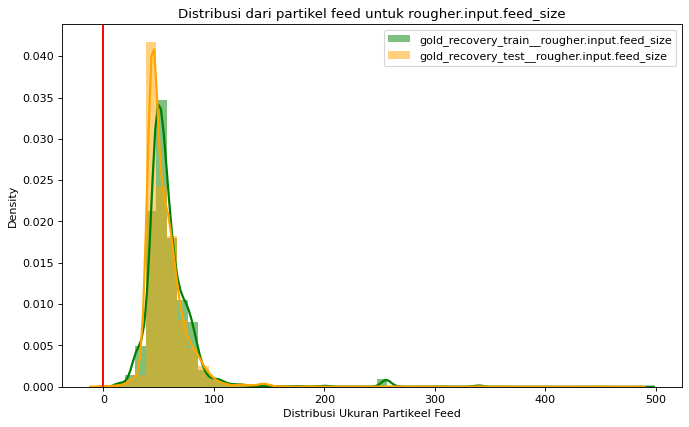

In [27]:
input_feed = [gold_recovery_train['rougher.input.feed_size'], gold_recovery_test['rougher.input.feed_size']]
xlabel_ = ['gold_recovery_train__rougher.input.feed_size', 'gold_recovery_test__rougher.input.feed_size']
xcolors = ['green', 'orange']

# distribusi dari ukuran partikel feed (rougher.input.feed_size)
plot_particle_size_distribution(gold_recovery_train)

# Distribusi plot dari partikel feed dari proses 'primary_cleaner.input.feed_size'

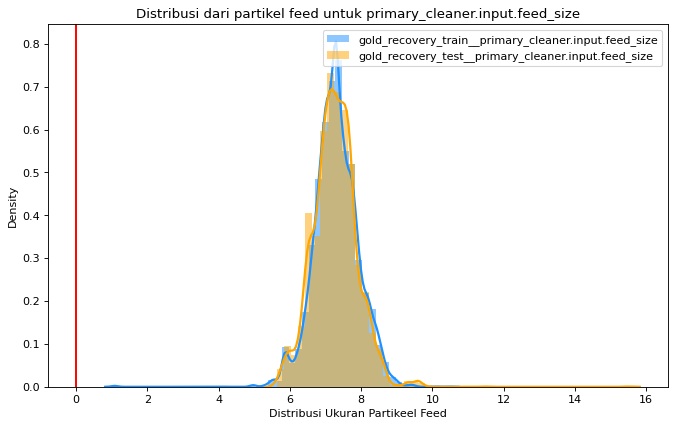

In [28]:
input_feed = [gold_recovery_train['primary_cleaner.input.feed_size'], gold_recovery_test['primary_cleaner.input.feed_size']]
xlabel_ = ['gold_recovery_train__primary_cleaner.input.feed_size', 'gold_recovery_test__primary_cleaner.input.feed_size']
xcolors = ['dodgerblue', 'orange']

# distribusi dari ukuran partikel feed (primary_cleaner.input.feed_size)
plot_particle_size_distribution(gold_recovery_test)

Kesimpulan :

Pada Tahap ini kita membandingkan ukuran partikel rata-rata untuk dataset train dan test. disini kita mengamati bahwa ukuran rata-rata partikel sama. Contohnya, ukuran partikel feed rata-rata untuk dataset train dan test masing-masing yakni 60 dan 56 pada proses rougher.input.feed_size, dan rata-rata ukuran partikel feed untuk dataset train dan test yakni 7.30 dan 7.2 untuk proses primary_cleaner.input.feed_size. Dari hasil pengamatan distribusi partikel feed adalah sama, Artinya Distribusi dari dataset train dan test tidak bervariasi secara signifikan, pada tahap selanjutnya kita dapat melatih model di dataset train dan menguji model di dataset test. 


### Menganalisa nilai abnormal pada distribusi gold_recovery_full  distribusi dalam proses : raw feed, rougher concentrate, and final concentrate. apakah terdapat anomali / outlier pada semua distribusi? bagaimana langkah kita untuk mengeliminasinya jika terdapat anomali / outlier ada distribusi tersebut?


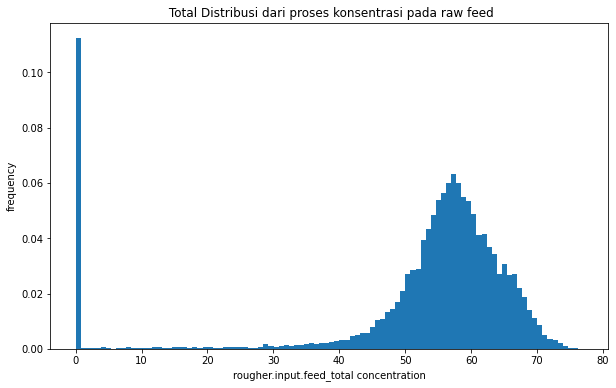

In [29]:
# rougher.input.feed pada dataset full
gold_recovery_full['rougher.input.feed.total_concentration'] = gold_recovery_full[['rougher.input.feed_ag',
                                                                                   'rougher.input.feed_pb', 
                                                                                   'rougher.input.feed_sol', 
                                                                                   'rougher.input.feed_au']].sum(axis=1)

# memriksa nilai anomali
total_conc_stage_1 = gold_recovery_full['rougher.input.feed.total_concentration']
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_1, density=True, bins=100)

# menambahkan judul dan nama 
plt.xlabel('rougher.input.feed_total concentration')
plt.ylabel('frequency')
plt.title(" Total Distribusi dari proses konsentrasi pada raw feed");


Pada histogram di atas menggambarkan total distribusi konsentrasi proses raw feed. pada distribusi dari `[rougher.input.feed.total_concentration]` ini distribusi miring ke kiri dengan ekor panjang memanjang ke kiri dan sebagian besar nilai mengelompok di sebelah kanan. Pada tanda nol, kita melihat lonjakan besar. Ini merupakan anomali atau outlier dalam data.

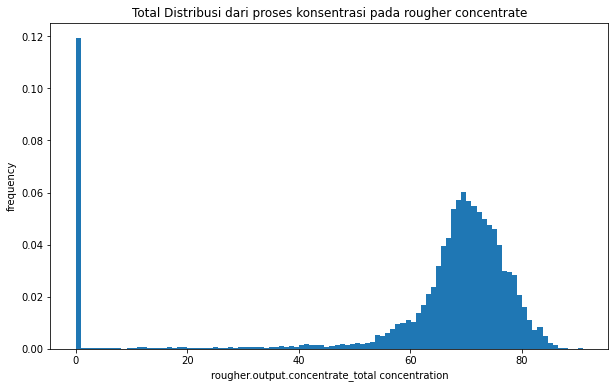

In [30]:
# rougher.output.concentrate pada full dataset
gold_recovery_full['rougher.output.concentrate.total_concentration'] = gold_recovery_full[['rougher.output.concentrate_ag',
                                                                                           'rougher.output.concentrate_pb',
                                                                                           'rougher.output.concentrate_sol',
                                                                                           'rougher.output.concentrate_au']].sum(axis=1)

# memriksa nilai anomali
total_conc_stage_2 = gold_recovery_full['rougher.output.concentrate.total_concentration']
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_2, density=True, bins=100)

# menambahkan judul dan nama 
plt.xlabel('rougher.output.concentrate_total concentration')
plt.ylabel('frequency')
plt.title("Total Distribusi dari proses konsentrasi pada rougher concentrate");

Pada histogram di atas menggambarkan total distribusi konsentrasi proses `rougher concentration`. pada distribusi dari `['rougher.output.concentrate.total_concentration']` ini distribusi miring ke kiri dengan ekor panjang memanjang ke kiri dan sebagian besar nilai mengelompok di sebelah kanan. Pada tanda nol, kita melihat lonjakan besar. Ini merupakan anomali atau outlier dalam data.

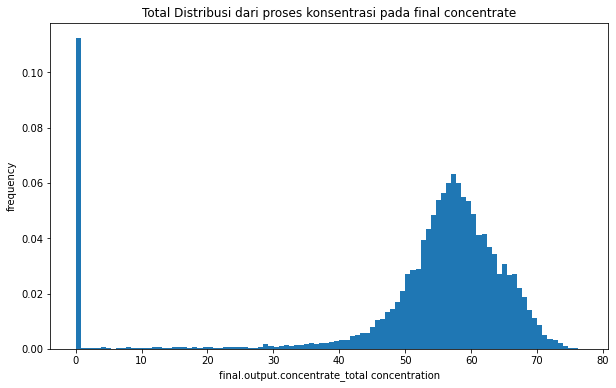

In [31]:
# final.output.concentrate pada full dataset
gold_recovery_full['final.output.concentrate.total_concentration'] = gold_recovery_full[['rougher.input.feed_ag',
                                                                                   'rougher.input.feed_pb', 
                                                                                   'rougher.input.feed_sol', 
                                                                                   'rougher.input.feed_au']].sum(axis=1)

# memriksa nilai anomali
total_conc_stage_3 = gold_recovery_full['final.output.concentrate.total_concentration'] 
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_3, density=True, bins=100)

# menambahkan judul dan nama 
plt.xlabel('final.output.concentrate_total concentration')
plt.ylabel('frequency')
plt.title("Total Distribusi dari proses konsentrasi pada final concentrate");

Pada histogram di atas menggambarkan total distribusi konsentrasi proses `final concentrate`. pada distribusi dari `['final.output.concentrate.total_concentration']` ini distribusi miring ke kiri dengan ekor panjang memanjang ke kiri dan sebagian besar nilai mengelompok di sebelah kanan. Pada tanda nol, kita melihat lonjakan besar. Ini merupakan anomali atau outlier dalam data.

Kesimpulan :

Kami menjumlahkan konsentrasi total semua zat pada tahapan yang berbeda dalam proses yaitu. raw feed `[rougher.input.feed.total_concentration]`, rougher concetrate `[rougher.output.concentrate.total_concentration]`, dan final concentrate  `[final.output.concentrate.total_concentration]`. lalu dengan memplot histogram dan mengamati puncak di ketiga plot menunjukkan anomali dalam data. Sangat aneh jika memiliki konsentrasi total sekitar 0, sehingga puncaknya adalah nilai abnormal dan Salah satu alasan yang mungkin untuk anomali tersebut adalah kesalahan entri data atau mewakili pengamatan yang terjadi dalam kondisi yang tidak biasa. Atau, mungkin itu adalah oservasiyang mungkin secara akurat menggambarkan variabilitas di wilayah studi. kita tidak pernah tahu tetapi satu hal yang harus dilakukan adalah menghapus anomali ini agar tidak menimbulkan bias, dengan menghilangkannya dan menetapkan ambang batas 0,95. 

### Memfilter Full Dataset tanpa anomaly

In [32]:
# memfilter full dataset tanpa anomaly 
gold_recovery_full_data =  gold_recovery_full[(gold_recovery_full['rougher.input.feed.total_concentration'] > 0.95) & 
                                        (gold_recovery_full['rougher.output.concentrate.total_concentration'] > 0.95) & 
                                        (gold_recovery_full['final.output.concentrate.total_concentration'] > 0.95)]

print('Panjang baris dari dataset full tanpa anomaly : ', format(gold_recovery_full_data.shape))


Panjang baris dari dataset full tanpa anomaly :  (20169, 90)


In [33]:
print('Informasi distribusi tanpa anomaly')
gold_recovery_full_data.describe()

Informasi distribusi tanpa anomaly


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
count,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,...,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000,20169.000000
mean,5.181331,9.874233,9.313900,43.445598,66.804303,9.662609,2.679577,10.316853,3.046675,142.923976,...,-462.084519,15.658728,-488.753423,12.212474,-487.116288,18.929550,-505.610047,56.871675,69.088854,56.871675
std,1.539089,1.936062,3.058229,6.842340,11.274330,2.495782,0.997232,3.159906,0.996843,46.891163,...,67.551706,5.526352,35.627789,5.315324,39.954969,5.553953,39.778437,8.225592,9.688037,8.225592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001982,...,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464,1.329681,1.064979,1.329681
25%,4.242546,9.101823,7.554877,43.190108,63.167249,8.045063,2.004206,8.692907,2.453737,112.364920,...,-500.187760,10.986849,-500.462260,8.977016,-500.130667,14.982351,-500.744921,53.268002,66.136370,53.268002
50%,5.084789,10.082382,9.153468,44.895986,68.146768,9.788126,2.732210,10.494473,2.992570,142.500589,...,-499.473842,14.996748,-499.790931,11.019896,-499.933619,19.953389,-500.047326,57.502487,70.345389,57.502487
75%,5.934334,11.031057,10.939022,46.213804,72.730246,11.207404,3.337185,12.011702,3.588607,174.911627,...,-400.147484,18.025333,-498.323325,14.017375,-499.416210,23.989110,-499.475424,61.945189,74.621679,61.945189
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,265.983123,...,-6.506986,43.709931,-244.483566,27.926001,-126.463446,32.188906,-29.093593,76.978947,90.964431,76.978947


In [34]:
print('Informasi distribusi dengan anomaly')
gold_recovery_full.describe()

Informasi distribusi dengan anomaly


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
count,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,...,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000
mean,4.768013,9.071366,8.537502,39.891718,66.475263,8.900622,2.471149,9.434396,2.819885,131.338303,...,-477.753153,14.831127,-504.279270,11.588761,-501.510723,17.904473,-520.266675,51.856810,61.518427,51.856810
std,2.042594,3.260960,3.858203,13.540157,13.042781,3.544045,1.201069,4.145832,1.269214,58.477466,...,95.648618,6.417280,74.648011,5.780520,80.663516,6.717178,76.976308,17.934564,23.412615,17.934564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526,0.000000,0.000000,0.000000
25%,4.011471,8.737809,7.036629,42.353890,62.258453,7.669323,1.780344,8.050901,2.297002,101.198976,...,-500.319422,10.938055,-500.641708,8.031211,-500.171370,13.031799,-501.000058,51.400302,63.325353,51.400302
50%,4.949959,9.910363,8.858385,44.639019,67.981407,9.477554,2.643964,10.174399,2.910336,137.084713,...,-499.616792,14.615849,-499.868380,10.987789,-499.953415,18.002995,-500.098653,56.788595,69.414309,56.788595
75%,5.857985,10.927188,10.667178,46.106662,72.941119,11.084153,3.282285,11.840024,3.552452,170.993920,...,-400.229299,18.014080,-498.503626,13.999903,-499.499414,23.007616,-499.527882,61.405688,74.025452,61.405688
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593,76.978947,90.964431,76.978947


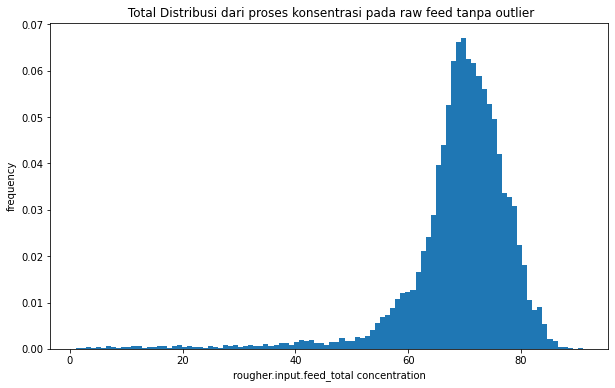

In [35]:
# rougher.input.feed pada dataset full tanpa anomali / outlier
gold_recovery_full_data['rougher.input.feed.total_concentration'] =   gold_recovery_full_data[['rougher.output.concentrate_ag',
                                                                                           'rougher.output.concentrate_pb',
                                                                                           'rougher.output.concentrate_sol',
                                                                                           'rougher.output.concentrate_au']].sum(axis=1)
# memriksa nilai anomali
plt.figure(figsize=(10,6))
total_conc_stage_1 = gold_recovery_full_data['rougher.input.feed.total_concentration'] 
plt.hist(total_conc_stage_1, density=True, bins=100)

# menambahkan judul dan nama 
plt.xlabel('rougher.input.feed_total concentration')
plt.ylabel('frequency')
plt.title(" Total Distribusi dari proses konsentrasi pada raw feed tanpa outlier");

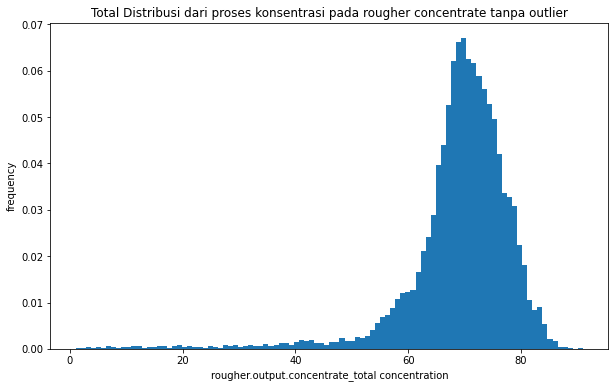

In [36]:
# rougher.output.concentrate pada full dataset tanpa anomali / outlier
gold_recovery_full_data['rougher.output.concentrate.total_concentration'] = gold_recovery_full_data[['rougher.output.concentrate_ag',
                                                                                           'rougher.output.concentrate_pb',
                                                                                           'rougher.output.concentrate_sol',
                                                                                           'rougher.output.concentrate_au']].sum(axis=1)

# memriksa nilai anomali
total_conc_stage_2 = gold_recovery_full_data['rougher.output.concentrate.total_concentration']
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_2, density=True, bins=100)

# menambahkan judul dan nama 
plt.xlabel('rougher.output.concentrate_total concentration')
plt.ylabel('frequency')
plt.title("Total Distribusi dari proses konsentrasi pada rougher concentrate tanpa outlier");

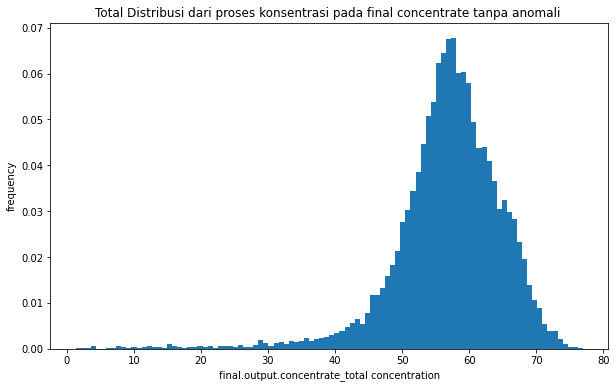

In [37]:
# final.output.concentrate pada full datasettanpa anomali / outlier
gold_recovery_full_data['final.output.concentrate.total_concentration'] = gold_recovery_full_data[['rougher.input.feed_ag',
                                                                                   'rougher.input.feed_pb', 
                                                                                   'rougher.input.feed_sol', 
                                                                                   'rougher.input.feed_au']].sum(axis=1)

# memriksa nilai anomali
total_conc_stage_3 = gold_recovery_full_data['final.output.concentrate.total_concentration'] 
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_3, density=True, bins=100)

# menambahkan judul dan nama 
plt.xlabel('final.output.concentrate_total concentration')
plt.ylabel('frequency')
plt.title("Total Distribusi dari proses konsentrasi pada final concentrate tanpa anomali ");

Kesimpulan :

Setelah menganalisis distribusi konsentrasi logam di seluruh tahap pemurnian, kita mengamati bahwa konsentrasi emas (au) meningkat dari `rougher.output` ke `final.output`. Hal ini menunjukkan bahwa proses berjalan seperti yang dirancang. lalu dengan membandingkan distribusi ukuran partikel feed untuk dataset train dan test, disini kita mengamati bahwa ukuran rata-rata partikel sama. Contohnya, ukuran partikel feed rata-rata untuk dataset train dan test masing-masing yakni 60 dan 56 pada proses rougher.input.feed_size, dan rata-rata ukuran partikel feed untuk dataset train dan test yakni 7.30 dan 7.2 untuk proses primary_cleaner.input.feed_size. 
kita juga memeriksa anomali dalam konsentrasi total semua zat pada tahap yang berbeda. Kami mengamati beberapa anomali dalam data dengan puncak abnormal dalam konsentrasi total pada 0. Kami menggunakan ambang batas antara 0,95 untuk menghilangkan anomali, serta kita telah  berhasil memfilter anomaly / outlier kita. sekarang kita siap untuk membuat model.

## Membuat model 

Sebelum membuat model dengan menghitung nilai sMAPE, kita akan memfilter dataset full tanpa outlier ke dataset train dan test.

In [38]:
# membuat index `date` untuk memfilter dataset train dan test
gold_recovery_test.set_index('date', inplace=True)
gold_recovery_train.set_index('date', inplace=True)
gold_recovery_full_data.set_index('date', inplace=True)

In [39]:
# memfilter index dari dataset train berdasarkan full dataset tanpa outlier
gold_recovery_train_data_index = gold_recovery_full_data.index.intersection(gold_recovery_train.index)
print('Panjang baris dari dataset train tanpa anomaly : ', format(gold_recovery_train_data_index.shape))

Panjang baris dari dataset train tanpa anomaly :  (14796,)


In [40]:
# train dataset baru 
gold_recovery_train_data = gold_recovery_full_data.loc[gold_recovery_train_data_index]
gold_recovery_train_data.reset_index(inplace=True)
gold_recovery_train_data

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,66.424950,66.424950,51.680034
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,67.012710,67.012710,50.659114
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,66.103793,50.609929
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,65.752751,65.752751,51.061546
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,65.908382,65.908382,47.859163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14791,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,70.781325,70.781325,53.415050
14792,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,70.539603,70.539603,53.696482
14793,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,55.376330,55.376330,54.589604
14794,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,69.201689,69.201689,54.027355


In [41]:
# memfilter index dari dataset test berdasarkan full dataset tanpa outlier
gold_recovery_test_data_index = gold_recovery_full_data.index.intersection(gold_recovery_test.index)
gold_recovery_test_data_index.shape

(5373,)

In [42]:
# test dataset baru
gold_recovery_test_data = gold_recovery_full_data.loc[gold_recovery_test_data_index]
gold_recovery_test_data.reset_index(inplace=True)
gold_recovery_test_data

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,79.939838,79.939838,72.871822
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,81.118880,81.118880,71.669225
2,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,79.267044,79.267044,73.202598
3,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,81.335254,81.335254,70.757057
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,80.902631,80.902631,68.654396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,2017-12-31 19:59:59,5.000174,9.710255,10.845459,46.400415,68.919891,13.944836,3.373224,13.766506,3.890235,...,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,67.518199,67.518199,68.910849
5369,2017-12-31 20:59:59,4.956679,9.727962,9.705617,46.657393,68.440582,12.624143,2.974607,14.177795,3.809054,...,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,67.695694,67.695694,67.166899
5370,2017-12-31 21:59:59,4.779534,9.818943,8.255551,47.337296,67.092759,12.134647,2.843604,13.219960,3.909903,...,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,72.437678,72.437678,66.955814
5371,2017-12-31 22:59:59,4.472036,9.473869,8.466341,48.258531,68.061186,12.331412,2.889243,12.165999,3.749126,...,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,73.701926,73.701926,67.420094


Dataset telah berhasil di filter dengan menghilangkan outliernya

Pada tahap membuat model kita akan memprediksi 2 values yakni :

1. rougher concentrate recovery `ougher.output.recovery`
2. final concentrate recovery `final.output.recovery`

Untuk melakukan itu, kita akan membuat dan melatih berbagai model, dan mengevaluasinya menggunakan validasi silang. Kita menggunakan rumus sMAPE dan Final sMAPE sebagai metrik evaluasi. Rumus sMAPE yakni:

In [43]:
from IPython.display import Image
Image(url= 'https://pictures.s3.yandex.net/resources/smape_1576239058_1589899769.jpg',width = 500, height = 200 )

In [44]:
# Fungsi untuk menghitung sMAPE
def smape(y_true, y_pred):
    smape = (np.abs(y_true - y_pred)/((np.abs(y_true) + np.abs(y_pred))/2)).mean()
    return smape

# fungsi untuk menghitung final sMAPE
def smape_final(y_true, y_pred):
    smape_out_rougher = smape(y_true[:,0], y_pred[:,0])
    smape_out_final = smape(y_true[:,1], y_pred[:,1])
    return ((0.25 * smape_out_rougher) + (0.75 * smape_out_final))

# sMAPE final Score
smape_score = make_scorer(smape_final)

In [45]:
# Mendefenisiskan variables features dan target

features_train = gold_recovery_train_data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = gold_recovery_test_data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = gold_recovery_train_data[['rougher.output.recovery', 'final.output.recovery']]
target_test = gold_recovery_test_data[['rougher.output.recovery', 'final.output.recovery']]

In [46]:
# # menstandarkan data numerik dengan features scaling 
scaler = StandardScaler()
scaler.fit(features_train)

# mengubah train set dan test set menggunggunakan transform()
features_train = scaler.transform(features_train)
features_test  = scaler.transform(features_test)

# mengubah target data menjadi numpy array
target_train = target_train.values
target_test = target_test.values

# Baseline model

In [47]:
# baseline model menggunakan dummy regressor
start_time = timeit.default_timer()
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy_regr_test_predictions = dummy_regr.predict(features_test)

# cross-validation untuk dumy regressor
cv_score_dm = cross_val_score(dummy_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Rata-rata sMAPE     : {:.2%}'.format(cv_score_dm.mean()))
print()
print('rentang nilai sMAPE :', cv_score_dm)
print()
print('Waktu Pelaksanaan   : ' + str((timeit.default_timer() - start_time)) + ' mins')
print()

#evaluasi model dengan metrik sMAPE
print('Skor final sMAPE : {:.2%}'.format(smape_final(target_test, dummy_regr_test_predictions)))

Rata-rata sMAPE     : 11.49%

rentang nilai sMAPE : [0.1194492  0.10572608 0.10316369 0.12331096 0.12301836]

Waktu Pelaksanaan   : 0.05075993435457349 mins

Skor final sMAPE : 10.30%


# Linear Regression Model

In [48]:
# Membuat Model 
start_time = timeit.default_timer()
lr_regr = LinearRegression().fit(features_train, target_train) # melatih model 
lr_regr_test_predictions = lr_regr.predict(features_test)

# cross-validation untuk linear Regressoion model
cv_score_lr = cross_val_score(lr_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Rata-rata sMAPE     : {:.2%}'.format(cv_score_lr.mean()))
print()
print('rentang nilai sMAPE :', cv_score_lr)
print()
print('Waktu Pelaksanaan   : ' + str((timeit.default_timer() - start_time)) + ' mins')
print()

#evaluasi model dengan metrik sMAPE
print('Skor final sMAPE    : {:.2%}'.format(smape_final(target_test, lr_regr_test_predictions)))

Rata-rata sMAPE     : 6.51%

rentang nilai sMAPE : [0.06982115 0.06148266 0.06417689 0.05731111 0.07261624]

Waktu Pelaksanaan   : 1.1915411693044007 mins

Skor final sMAPE    : 5.87%


# Decision Tree Regression model

In [49]:
# Membuat Model 
start_time = timeit.default_timer()
dt_regr = DecisionTreeRegressor().fit(features_train, target_train)  # melatih model
dt_regr_test_predictions = dt_regr.predict(features_test)

# cross-validation for decision tree regression
cv_score_dt = cross_val_score(dt_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Rata-rata sMAPE     :  {:.4%}'.format(cv_score_dt.mean()))
print()
print('rentang nilai sMAPE : ', cv_score_dt)
print()
print("Waktu Pelaksanaan   : " + str((timeit.default_timer() - start_time)/60) + ' mins')
print()
#evaluasi model dengan metrik sMAPE
print('Skor final sMAPE    : {:.2%}'.format(smape_final(target_test, dt_regr_test_predictions)))

Rata-rata sMAPE     :  nan%

rentang nilai sMAPE :  [      nan       nan       nan       nan 0.0667237]

Waktu Pelaksanaan   : 0.22992946635155628 mins

Skor final sMAPE    : nan%


In [50]:
# Menentukan skema cross validation 
for i in [2, 4, 8, 16]:
    dt = DecisionTreeRegressor(max_depth = i, random_state = 12345)
    dt.fit(features_train, target_train)
    cross_val_scores_dt = cross_val_score(dt, features_train, target_train, cv=5, scoring=smape_score)
    print('Max depth: ' + str(i) + ', rata-rata smape: {:.4%}'.format(cross_val_scores_dt.mean()))

Max depth: 2, rata-rata smape: 10.4660%
Max depth: 4, rata-rata smape: nan%
Max depth: 8, rata-rata smape: nan%
Max depth: 16, rata-rata smape: nan%


In [ ]:
# Optimasi hyperparameters
start_time = timeit.default_timer()

# Menentukan hyperparameters untuk di tuning
params_ = {
    "max_depth" : [2, 4, 8, 16],
    "min_samples_split" : [2, 4, 8, 16]
    }
# Menentukan model
dt_regressor = DecisionTreeRegressor()

# Menentukan grid search
grid_search_dt = GridSearchCV(estimator = dt_regressor, param_grid = params_, scoring=smape_score)

# menjalankan model
grid_search_dt.fit(features_train, target_train)

# Hasil hyperparameters terbaik
print('Hasil Hyperparameters terbaik : {}'.format(grid_search_dt.best_params_))
print()
print("Waktu Pelaksanaan             : " + str((timeit.default_timer() - start_time)/60) + ' mins')

In [ ]:
# Membuat fungsi untuk model decision tree regressor
def decision_tree_regressor(X_train, y_train, X_test, y_test):

    # membuat model 
    dt_model = DecisionTreeRegressor(**grid_search_dt.best_params_)
    dt_model.fit(X_train, y_train) # train the model 
   
    # membuat prediksi pada test dataset
    dt_test_predictions = dt_model.predict(X_test)
    
    # Menghitung final sMAPE decision tree regressor
    print('Skor final sMAPE  : {:.2%}'.format(smape_final(target_test, dt_test_predictions)))


In [ ]:
# Menjalankan fungsi
decision_tree_regressor(features_train, target_train, features_test, target_test)

## Kesimpulan Akhir

Pada tahap ini, kita memeriksa data dan mengamati bahwa : 
1. data gold_recovery_train, memiliki 16.860 rows, 86 features, dan 85 columns ngan NA. 
2. data gold_recovery_test , memiliki 5.856 rows, 52 features, dan 51 columns dengan NA. 
3. data gold_recovery_full , memiliki 22.716 baris, 86 features, dan 85 columns dengan NA. 

lalu setelah memeriksa dataset kita mendapati bahwa features 'date' memiliki tipe data yang tidak tepat. setelah merubah tipe data ke tipe data datetime kita mengisi nilai yang hilang dengan metode ffill metode ini mengganti nilai yang hilang dengan nilai dari baris sebelumnya (atau kolom sebelumnya, jika parameter sumbu diatur ke 'kolom').

---

Dari perhitungan yang dilakukan, kita dapat melihat bahwa  calculated_recovery dan rougher.output.recovery memiliki nilai yang sama. dan score Mean Absolute Erronya adalah 0,0. Ini menunjukkan bahwa nilai yang dihitung dari proses pemulihan yang disimulasikan mirip dengan rougher.output.recovery.

---

Setelah memeriksa fitur yang tidak tersedia di dataset test, dapat dilihat dataset train memiliki 34 fitur  yang tidak tersedia di dataset test. Fitur yang tidak terdapat pada dataset test antara lain fitur yang mengandung konsentrasi logam Au = emas, Ag = perak , Pb = timbal. dan jenis parameternya adalah output — product parameters, calculation — calculation characteristics


---


Kami menjumlahkan konsentrasi total semua zat pada tahapan yang berbeda dalam proses yaitu. raw feed `[rougher.input.feed.total_concentration]`, rougher concetrate `[rougher.output.concentrate.total_concentration]`, dan final concentrate  `[final.output.concentrate.total_concentration]`. lalu dengan memplot histogram dan mengamati puncak di ketiga plot menunjukkan anomali dalam data. Sangat aneh jika memiliki konsentrasi total sekitar 0, sehingga puncaknya adalah nilai abnormal dan Salah satu alasan yang mungkin untuk anomali tersebut adalah kesalahan entri data atau mewakili pengamatan yang terjadi dalam kondisi yang tidak biasa. Atau, mungkin itu adalah oservasiyang mungkin secara akurat menggambarkan variabilitas di wilayah studi. kita tidak pernah tahu tetapi satu hal yang harus dilakukan adalah menghapus anomali ini agar tidak menimbulkan bias, dengan menghilangkannya dan menetapkan ambang batas 0,95. 

---

Setelah membuat prediksi dengan menggunakan rumus sMAPE, final sMAPE dan mengevaluasinya menggunakan validasi silang, kita mendapatkan hasil sebagai berikut :

1. Dummy Regressor dengan Skor final sMAPE                         : 10.30%
2. Linear Regression dengan Skor final sMAPE                       : 5.87%
3. Decision Tree Regressor tanpa hyperparameters Skor final sMAPE  : nan%
4. Decision Tree Regressor tuning hyperparameters Skor final sMAPE : 9.08% 